In [1]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\predict_K')
sys.path

['C:\\Users\\Mechano_2',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\python37.zip',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\DLLs',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final',
 '',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Mechano_2\\.ipython',
 'C:\\Users\\Mechano_2\\PycharmProjects\\predict_K']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

path = r"C:\Users\Mechano_2\PycharmProjects\predict_K\data\nsga"
object_list = glob.glob(path + '/*Value.xlsx')
parameter_list = glob.glob(path + '/*.txt')
dF = pd.DataFrame()

for i in range(5):
    data_df = pd.read_excel(object_list[i],header=1)
    lattice_data = pd.read_csv(parameter_list[i],sep='\t',header=None, names=['lattice_name', 'point', 'Nan', 'a', 'b','c'
                                                               ,'alpha','beta','gamma','ok'],index_col=False)

    data_df_1 = data_df.copy()[['Vol (real)', 'E', 'ε', 'σ', 'E/ρ', 'ε/ρ', 'σ/ρ']]
    data_df_1 = pd.concat([lattice_data,data_df_1], axis=1)
    data_df_2 = data_df.copy()[['Vol (real)', 'E.1', 'ε.1', 'σ.1', 'E/ρ.1', 'ε/ρ.1', 'σ/ρ.1']].rename(columns={'E.1':'E', 'ε.1':'ε', 'σ.1':'σ', 'E/ρ.1':'E/ρ', 'ε/ρ.1':'ε/ρ', 'σ/ρ.1':'σ/ρ'})
    data_df_2 = pd.concat([lattice_data,data_df_2], axis=1)
    data_df_3 = data_df.copy()[['Vol (real)', 'E.2', 'ε.2', 'σ.2', 'E/ρ.2', 'ε/ρ.2', 'σ/ρ.2']].rename(columns={'E.2':'E', 'ε.2':'ε', 'σ.2':'σ', 'E/ρ.2':'E/ρ', 'ε/ρ.2':'ε/ρ', 'σ/ρ.2':'σ/ρ'})
    data_df_3 = pd.concat([lattice_data,data_df_3], axis=1)
    df = data_df_1.append(data_df_2.append(data_df_3)).dropna(how='all')
    df['Generation'] = i
    dF = dF.append(df)
del data_df_1, data_df_2, data_df_3, df
def split_name(x):
    return x.split('.')[-1]
dF.lattice_name = dF.lattice_name.apply(split_name)

dF= dF.drop(['ok'],axis=1)
dF.to_pickle(path+"./data_combine.pkl")

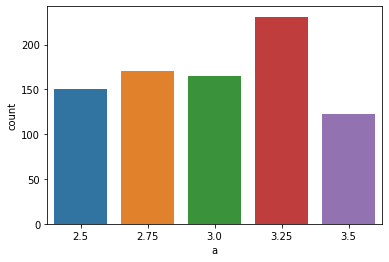

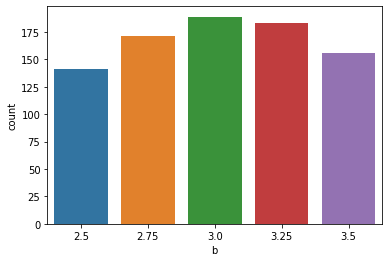

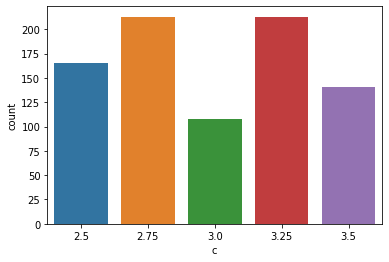

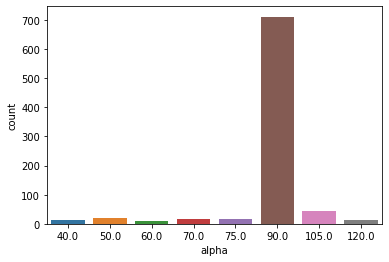

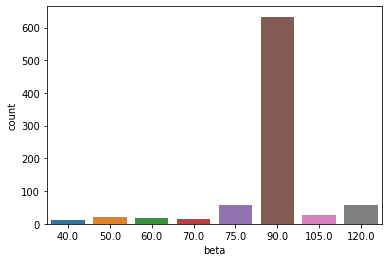

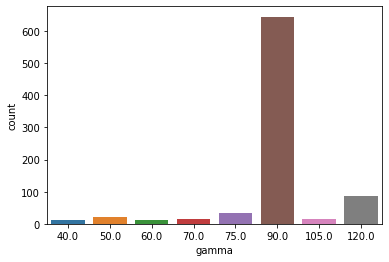

[' Base-Centered Monoclinic' ' Base-Centered Orthorhombic'
 ' Body-Centered Cubic' ' Body-Centered Orthorhombic'
 ' Body-Centered Tetragonal' ' Face-Centered Cubic'
 ' Face-Centered Orthorhombic' ' Primitive Cubic' ' Primitive Monoclinic'
 ' Primitive Orthorhombic' ' Primitive Rhombohedral'
 ' Primitive Tetragonal' ' Primitive Triclinic' ' Primitive hexagonal']

 ---------------------------------------------------------------------------------------------------- 

[2.5  2.75 3.   3.25 3.5 ]


In [11]:
df = pd.read_pickle(path+"./data_combine.pkl")

fig, ax = plt.subplots()
sns.countplot(x='a', data=dF)
plt.show()
sns.countplot(x='b', data=dF)
plt.show()
sns.countplot(x='c', data=dF)
plt.show()
sns.countplot(x='alpha', data=dF)
plt.show()
sns.countplot(x='beta', data=dF)
plt.show()
sns.countplot(x='gamma', data=dF)
plt.show()
print(np.unique(dF.lattice_name))
print('\n','-'*100,'\n')
print(np.unique(dF[df['lattice_name']== 'Base-Centered Monoclinic'].a))

In [22]:
'Primitive Triclinic'
aa = dF[df['lattice_name']== 'Primitive Triclinic']
aa

,lattice_name,point,Nan,a,b,c,alpha,beta,gamma,Vol (real),E,ε,σ,E/ρ,ε/ρ,σ/ρ,Generation


In [80]:
from sklearn import preprocessing
import numpy as np

scalerx = preprocessing.MinMaxScaler()
scalery = preprocessing.MinMaxScaler()

features_std = scalerx.fit_transform(df[['a', 'b','c','alpha','beta','gamma']])
features_std_target = scalery.fit_transform(df[['E', 'ε', 'σ']])
data, target = features_std, features_std_target
features_std

array([[0.    , 0.75  , 0.25  , 0.4375, 0.8125, 0.25  ],
       [1.    , 0.5   , 0.75  , 0.8125, 1.    , 0.4375],
       [0.75  , 1.    , 0.    , 0.25  , 0.4375, 0.8125],
       ...,
       [1.    , 1.    , 1.    , 0.625 , 0.625 , 0.625 ],
       [0.75  , 0.75  , 0.75  , 0.625 , 0.625 , 0.625 ],
       [0.75  , 0.75  , 0.75  , 0.625 , 0.625 , 0.625 ]])

In [86]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


X_train_full, X_test, y_train_full, y_test = train_test_split(data, target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu", kernel_initializer='he_uniform')(input_)
hidden2 = keras.layers.Dense(30, activation="relu", kernel_initializer='he_uniform')(hidden1)
hidden3 = keras.layers.Dense(30, activation="relu", kernel_initializer='he_uniform')(hidden2)
hidden4 = keras.layers.Dense(30, activation="relu", kernel_initializer='he_uniform')(hidden3)
concat = keras.layers.concatenate([input_, hidden4])
output = keras.layers.Dense(3)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 30)           210         input_10[0][0]                   
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 30)           930         dense_25[0][0]                   
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 30)           930         dense_26[0][0]                   
____________________________________________________________________________________________

In [87]:
model.compile(loss="mean_squared_error", optimizer="rmsprop",metrics=["mse"])
history = model.fit(X_train, y_train, epochs=5000,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]
epoch_count = range(1, len(training_loss)+1)

Train on 472 samples, validate on 158 samples
Epoch 1/5000
472/472 [==============================] - 1s 1ms/sample - loss: 0.0956 - mse: 0.0956 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 2/5000
472/472 [==============================] - 0s 119us/sample - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 3/5000
472/472 [==============================] - 0s 119us/sample - loss: 0.0405 - mse: 0.0405 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 4/5000
472/472 [==============================] - 0s 121us/sample - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 5/5000
472/472 [==============================] - 0s 119us/sample - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 6/5000
472/472 [==============================] - 0s 119us/sample - loss: 0.0319 - mse: 

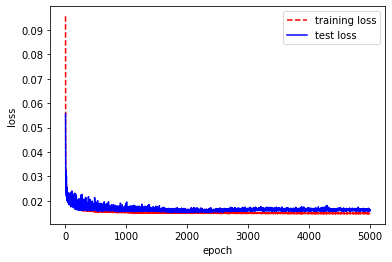

In [88]:
plt.plot(epoch_count, training_loss,"r--")
plt.plot(epoch_count, test_loss,"b-")
plt.legend(["training loss","test loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [89]:
gg = np.array(df[['a', 'b','c','alpha','beta','gamma', 'E', 'ε', 'σ']].iloc[0])

data, target = scalerx.transform([gg[:6]]), scalery.transform([gg[-3:]])

In [90]:
predict = model.predict(data)

print('예측값:', scalery.inverse_transform(target), '\n 실제값:', scalery.inverse_transform(predict))


예측값: [[4.1751  0.10982 0.34425]] 
 실제값: [[8.550772   0.12675025 0.43209657]]
